# State-based representation

A search problem can be formally defined by:
- <b>State space</b>: Set of possible states of the problem.
- <b>Initial state $s_0$</b>: The state in which the search starts.
- <b>Actions($s$)</b>: Possible actions applied to state $s$.
- <b>Result($s$,$a$)</b>: Resulting state from doing action $a$ in state $s$.
- <b>Goal($s$)</b>: Determines whether $s$ is a solution or not.
- <b>Cost($c$)</b>: Cost of path $c$ (sequence of actions).

<b>State graph</b>: nodes are states and edges are actions

<b>Objective</b>: find a goal state (optimal solution if possible)

## Example: 4-puzzle

Played on a 2-by-2 grid with 3 square blocks labeled 1 through 3 and a blank square labeled 0. 

The goal is to rearrange the blocks so that they are in order. 

It is allowed to <i>slide the blank square</i> horizontally, left (l) and right (r), or vertically, up (u) and down (d)

{('01\n23', '10\n23'): Text(12.5, 300.0, 'r/l'),
 ('10\n23', '13\n20'): Text(17.5, 300.0, 'd/u'),
 ('13\n20', '13\n02'): Text(22.5, 300.0, 'l/r'),
 ('13\n02', '03\n12'): Text(25.0, 250.0, 'u/d'),
 ('03\n12', '30\n12'): Text(25.0, 150.0, 'r/l'),
 ('30\n12', '32\n10'): Text(25.0, 50.0, 'd/u'),
 ('32\n10', '32\n01'): Text(22.5, 0.0, 'r/l'),
 ('32\n01', '02\n31'): Text(17.5, 0.0, 'd/u'),
 ('02\n31', '20\n31'): Text(12.5, 0.0, 'r/l'),
 ('20\n31', '21\n30'): Text(10.0, 50.0, 'd/u'),
 ('21\n30', '21\n03'): Text(10.0, 150.0, 'l/r'),
 ('21\n03', '01\n23'): Text(10.0, 250.0, 'u/d')}

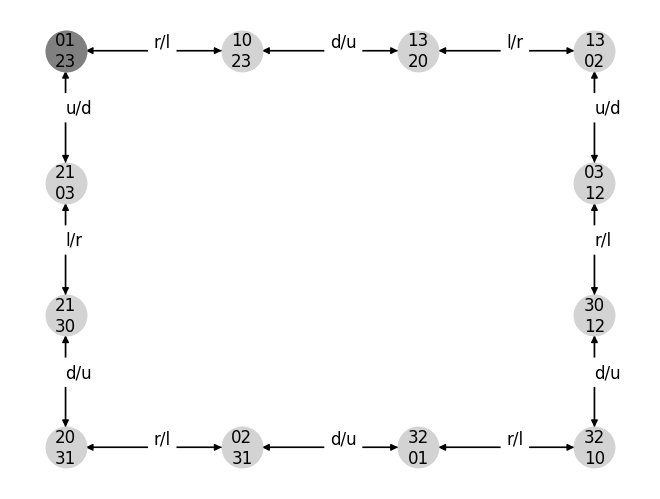

In [43]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'01\n23':['10\n23','21\n03'],'10\n23':['13\n20','01\n23'],'13\n20':['13\n02','10\n23'],'13\n02':['03\n12','13\n20'],'03\n12':['30\n12','13\n02'],'30\n12':['32\n10','03\n12'],'32\n10':['32\n01','30\n12'],'32\n01':['02\n31','32\n10'],'02\n31':['20\n31','32\n01'],'20\n31':['21\n30','02\n31'],'21\n30':['20\n31','21\n03'],'21\n03':['01\n23','21\n30']}
L={('01\n23','10\n23'):'r/l',('10\n23','13\n20'):'d/u',('13\n20','13\n02'):'l/r',('13\n02','03\n12'):'u/d',('03\n12','30\n12'):'r/l',('30\n12','32\n10'):'d/u',('32\n10','32\n01'):'r/l',('32\n01','02\n31'):'d/u',('02\n31','20\n31'):'r/l',('20\n31','21\n30'):'d/u',('21\n30','21\n03'):'l/r',('21\n03','01\n23'):'u/d'}
Target=['01\n23']
nxG=nx.DiGraph(G)
pos_nodes={'01\n23':(10, 300),'10\n23':(15, 300),'13\n20':(20, 300),'13\n02':(25, 300),'03\n12':(25, 200),'30\n12':(25, 100),'32\n10':(25, 0),'32\n01':(20, 0),'02\n31':(15, 0),'20\n31':(10, 0),'21\n30':(10, 100),'21\n03':(10, 200)}
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray",node_size=850,font_size=12)
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray',node_size=850)
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=L,font_size=12,horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)

The search problem for 4-puzzle:
- <b>State space</b>: Set of possible configurations of the grid.
- <b>Initial state $s_0$</b>: Initial configuration of the grid.
- <b>Actions($s$)</b>: Left, right, up and down.
- <b>Result($s$,$a$)</b>: See examples above.
- <b>Goal($s$)</b>: Final configuration of the grid.
- <b>Cost($c$)</b>: Each action has unitary cost .

## Example of search space

{('13\n20', '10\n23'): Text(117.0, 161.48, 'up'),
 ('13\n20', '13\n02'): Text(153.0, 161.48, 'left'),
 ('10\n23', '01\n23'): Text(63.0, 71.74, 'left'),
 ('10\n23', '13\n20 '): Text(99.0, 71.74, 'down'),
 ('13\n02', '03\n12'): Text(171.0, 71.74, 'up'),
 ('13\n02', '13\n 20 '): Text(207.0, 71.74, 'right')}

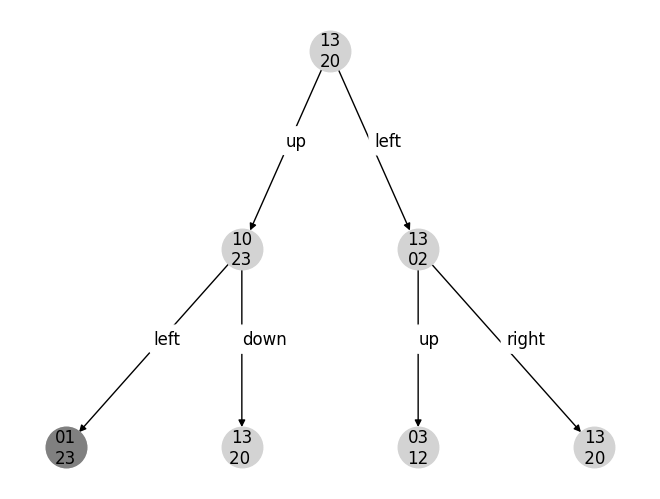

In [55]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'10\n23':['01\n23','13\n20 '],'13\n20':['10\n23','13\n02'],'13\n02':['03\n12','13\n 20 ']}
#L={('01\n23','10\n23'):'r/l',('10\n23','13\n20'):'d/u',('13\n20','13\n02'):'l/r',('13\n02','03\n12'):'u/d',('03\n12','30\n12'):'r/l',('30\n12','32\n10'):'d/u',('32\n10','32\n01'):'r/l',('32\n01','02\n31'):'d/u',('02\n31','20\n31'):'r/l',('20\n31','21\n30'):'d/u',('21\n30','21\n03'):'l/r',('21\n03','01\n23'):'u/d'}
L={('13\n20','10\n23'):'up',('13\n20','13\n02'):'left',('10\n23','01\n23'):'left',('10\n23','13\n20 '):'down',('13\n02','03\n12'):'up',('13\n02','13\n 20 '):'right'}
Target=['01\n23']
nxG=nx.DiGraph(G)
pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot')
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray",node_size=850,font_size=12)
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray',node_size=850)
nx.draw_networkx_edge_labels(nxG, pos=pos_nodes,edge_labels=L,font_size=12,horizontalalignment="left",verticalalignment="bottom",rotate=False, label_pos=0.5)

The <b>search space is different from the state space</b>, since the former may include repeated nodes.

Components of each node $n$ in the tree search:
- State
- Parent
- Action
- Cost of the path to reach $n$: $g(n)$
- Evaluation function: $f(n)$
- Depth

## Search strategies

- Uninformed search: 
  - [Breadth first search](Breadth%20First%20Search%20(BFS)/bfs.ipynb)
  - [Depth first search (recursive - tree search)](Depth%20First%20Search%20(DFS)/dfs-recursive.ipynb) [(iterative - tree search)](Depth%20First%20Search%20(DFS)/dfs-tree.ipynb) [(iterative - graph search)](Depth%20First%20Search%20(DFS)/dfs-tree.ipynb) [(backtracking - tree search)](Depth%20First%20Search%20(DFS)/dfs-bt.ipynb)
  - [Iterative deepening search](Iterative%20Deepening%20Search%20(IDS)/ids.ipynb)
  - [Uniform cost search](Uniform%20Cost%20Search%20(UCS)/ucs.ipynb)
- Informed search:
  - [A* star (graph search)](A%20star/astar.ipynb) [(tree search)](A%20star/astar-tree.ipynb)
  - [Best first search (graph search)](Best%20First%20Search/gbfs.ipynb) [(tree search)](Best%20First%20Search/gbfs-tree.ipynb)
  - [Iterative deepening A* (graph search)](Iterative%20Deepening%20A%20star/idastar-graph.ipynb) [(tree search)](Iterative%20Deepening%20A%20star/idastar.ipynb)
  - Recursive best first search
